<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tree-Cover,-Green-Space,-and-Air-Quality-Correlation-to-Acute-Respiratory-Illnesses-in-Cleveland,-Los-Angeles,-New-York,-and-Tampa-(2020-2021-Data)-(EDA)" data-toc-modified-id="Tree-Cover,-Green-Space,-and-Air-Quality-Correlation-to-Acute-Respiratory-Illnesses-in-Cleveland,-Los-Angeles,-New-York,-and-Tampa-(2020-2021-Data)-(EDA)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tree Cover, Green Space, and Air Quality Correlation to Acute Respiratory Illnesses in Cleveland, Los Angeles, New York, and Tampa (2020-2021 Data) (EDA)</a></span><ul class="toc-item"><li><span><a href="#Outer-merge-the-two-dataframes" data-toc-modified-id="Outer-merge-the-two-dataframes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Outer merge the two dataframes</a></span></li><li><span><a href="#Plotting-yearly-average-PM2.5-AQI-levels-for-Cleveland,-Los-Angeles,-New-York,-and-Tampa-2020-2021" data-toc-modified-id="Plotting-yearly-average-PM2.5-AQI-levels-for-Cleveland,-Los-Angeles,-New-York,-and-Tampa-2020-2021-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotting yearly average PM2.5 AQI levels for Cleveland, Los Angeles, New York, and Tampa 2020-2021</a></span></li><li><span><a href="#Two-cities-comparison" data-toc-modified-id="Two-cities-comparison-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Two-cities comparison</a></span></li><li><span><a href="#Cumulative-Moving-Average" data-toc-modified-id="Cumulative-Moving-Average-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Cumulative Moving Average</a></span></li><li><span><a href="#Preliminary-stats" data-toc-modified-id="Preliminary-stats-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Preliminary stats</a></span></li></ul></li></ul></div>

# Tree Cover, Green Space, and Air Quality Correlation to Acute Respiratory Illnesses in Cleveland, Los Angeles, New York, and Tampa (2020-2021 Data) (EDA)

1. Data Wrangling

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle
import seaborn as sns
%matplotlib inline
import string
import collections

from pandas.plotting import register_matplotlib_converters
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings('ignore')

I. Cleveland-Elyria OH

In [3]:
df_cle = pd.read_csv(r'D:\AQIdata\air_cle.csv')
df_cle.head()

,Date,PM2.5 AQI Value,Main Pollutant,Site Name,Site ID,Source
0,01/01/2020,44,NaN,Cleveland Near Road,39-035-0073,AQS
1,01/02/2020,25,NaN,Cleveland Near Road,39-035-0073,AQS
2,01/03/2020,57,NaN,Cleveland Near Road,39-035-0073,AQS
3,01/04/2020,48,NaN,Cleveland Near Road,39-035-0073,AQS
4,01/05/2020,28,NaN,Cleveland Near Road,39-035-0073,AQS


In [4]:
df_cle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             731 non-null    object 
 1   PM2.5 AQI Value  731 non-null    int64  
 2   Main Pollutant   0 non-null      float64
 3   Site Name        731 non-null    object 
 4   Site ID          731 non-null    object 
 5   Source           731 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 34.4+ KB


In [5]:
df_cle.shape

(731, 6)

In [6]:
df_cle.isnull().sum()

Date                 0
PM2.5 AQI Value      0
Main Pollutant     731
Site Name            0
Site ID              0
Source               0
dtype: int64

In [7]:
df_cle = df_cle.drop(columns='Main Pollutant')
df_cle.isnull().sum()

Date               0
PM2.5 AQI Value    0
Site Name          0
Site ID            0
Source             0
dtype: int64

In [8]:
df_cle['Date']= pd.to_datetime(df_cle['Date'])
df_cle['Date']

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
726   2021-12-27
727   2021-12-28
728   2021-12-29
729   2021-12-30
730   2021-12-31
Name: Date, Length: 731, dtype: datetime64[ns]

In [9]:
# Save as new csv file
df_cle.to_csv('df_cle_2021.csv', index=False)

In [10]:
# Read the new csv file
df_cle_2021 = pd.read_csv(r'C:\Users\yuvem\df_cle_2021.csv', parse_dates=['Date'], index_col=['Date'], na_values=['.'], encoding='utf-8')
df_cle_2021.head()

,PM2.5 AQI Value,Site Name,Site ID,Source
Date,,,,
2020-01-01,44,Cleveland Near Road,39-035-0073,AQS
2020-01-02,25,Cleveland Near Road,39-035-0073,AQS
2020-01-03,57,Cleveland Near Road,39-035-0073,AQS
2020-01-04,48,Cleveland Near Road,39-035-0073,AQS
2020-01-05,28,Cleveland Near Road,39-035-0073,AQS


In [11]:
# calculate the yearly average PM2.5 AQI 
df_cle_2021['PM2.5 AQI Value'] = df_cle_2021.mean(axis=1)

# drop columns containing monthly values
df_aqi_cle_2021 = df_cle_2021[['PM2.5 AQI Value']]

# visualize the first 5 columns
df_aqi_cle_2021.head()

,PM2.5 AQI Value
Date,
2020-01-01,44.0
2020-01-02,25.0
2020-01-03,57.0
2020-01-04,48.0
2020-01-05,28.0


II. Los Angeles CA

In [12]:
df_la = pd.read_csv(r'D:\AQIdata\air_la.csv')
df_la.head()

,Date,PM2.5 AQI Value,Main Pollutant,Site Name,Site ID,Source
0,01/01/2020,102,NaN,Long Beach-Route 710 Near Road,06-037-4008,AQS
1,01/02/2020,72,NaN,Compton,06-037-1302,AQS
2,01/03/2020,87,NaN,Long Beach-Route 710 Near Road,06-037-4008,AQS
3,01/04/2020,104,NaN,Compton,06-037-1302,AQS
4,01/05/2020,103,NaN,Compton,06-037-1302,AQS


In [13]:
df_la.isnull().sum()

Date                 0
PM2.5 AQI Value      0
Main Pollutant     731
Site Name            0
Site ID              0
Source               0
dtype: int64

In [14]:
df_la = df_la.drop(columns='Main Pollutant')

In [15]:
df_la['Date']= pd.to_datetime(df_la['Date'])

In [16]:
# Save as new csv file
df_la.to_csv('df_la_2021.csv', index=False)

In [17]:
# Read new csv file for LA
df_la_2021 = pd.read_csv(r'C:\Users\yuvem\df_la_2021.csv', parse_dates=['Date'], index_col=['Date'], na_values=['.'], encoding='utf-8')
df_la_2021.head()

,PM2.5 AQI Value,Site Name,Site ID,Source
Date,,,,
2020-01-01,102,Long Beach-Route 710 Near Road,06-037-4008,AQS
2020-01-02,72,Compton,06-037-1302,AQS
2020-01-03,87,Long Beach-Route 710 Near Road,06-037-4008,AQS
2020-01-04,104,Compton,06-037-1302,AQS
2020-01-05,103,Compton,06-037-1302,AQS


In [18]:
# calculate the yearly average PM2.5 AQI 
df_la_2021['PM2.5 AQI Value'] = df_la_2021.mean(axis=1)

# drop columns containing monthly values
df_aqi_la_2021 = df_la_2021[['PM2.5 AQI Value']]

# visualize the first 5 columns
df_aqi_la_2021.head()

,PM2.5 AQI Value
Date,
2020-01-01,102.0
2020-01-02,72.0
2020-01-03,87.0
2020-01-04,104.0
2020-01-05,103.0


III. New York-Newark-Jersey City, NY-NJ-PA

In [19]:
df_ny = pd.read_csv(r'D:\AQIdata\air_ny.csv')
df_ny.head()

,Date,PM2.5 AQI Value,Main Pollutant,Site Name,Site ID,Source
0,01/01/2020,36,NaN,Intermediate School 143,36-061-0115,AQS
1,01/02/2020,56,NaN,Intermediate School 143,36-061-0115,AQS
2,01/03/2020,68,NaN,Fort Lee Near Road,34-003-0010,AQS
3,01/04/2020,63,NaN,Fort Lee Near Road,34-003-0010,AQS
4,01/05/2020,37,NaN,CCNY,36-061-0135,AQS


In [20]:
df_ny = df_ny.drop(columns='Main Pollutant')

In [21]:
df_ny['Date']= pd.to_datetime(df_ny['Date'])

In [22]:
# Save as new csv file
df_ny.to_csv('df_ny_2021.csv', index=False)

In [23]:
# Read new csv file for NY
df_ny_2021 = pd.read_csv(r'C:\Users\yuvem\df_ny_2021.csv', parse_dates=['Date'], index_col=['Date'], na_values=['.'], encoding='utf-8')
df_ny_2021.head()

,PM2.5 AQI Value,Site Name,Site ID,Source
Date,,,,
2020-01-01,36,Intermediate School 143,36-061-0115,AQS
2020-01-02,56,Intermediate School 143,36-061-0115,AQS
2020-01-03,68,Fort Lee Near Road,34-003-0010,AQS
2020-01-04,63,Fort Lee Near Road,34-003-0010,AQS
2020-01-05,37,CCNY,36-061-0135,AQS


In [24]:
# calculate the yearly average PM2.5 AQI 
df_ny_2021['PM2.5 AQI Value'] = df_ny_2021.mean(axis=1)

# drop columns containing monthly values
df_aqi_ny_2021 = df_ny_2021[['PM2.5 AQI Value']]

# visualize the first 5 columns
df_aqi_ny_2021.head()

,PM2.5 AQI Value
Date,
2020-01-01,36.0
2020-01-02,56.0
2020-01-03,68.0
2020-01-04,63.0
2020-01-05,37.0


IV. Tampa-St. Petersburg-Clearwater, FL

In [25]:
df_ta = pd.read_csv(r'D:\AQIdata\air_tp.csv')
df_ta.head()

,Date,PM2.5 AQI Value,Main Pollutant,Site Name,Site ID,Source
0,01/01/2020,108,NaN,SYDNEY,12-057-3002,AQS
1,01/02/2020,40,NaN,SYDNEY,12-057-3002,AQS
2,01/03/2020,38,NaN,USMC Reserve Center (Gandy),12-057-1065,AQS
3,01/04/2020,36,NaN,John Chesnut Sr. Park - East Lake,12-103-5002,AQS
4,01/05/2020,24,NaN,John Chesnut Sr. Park - East Lake,12-103-5002,AQS


In [26]:
df_ta = df_ta.drop(columns='Main Pollutant')

In [27]:
df_ta['Date']= pd.to_datetime(df_ta['Date'])

In [28]:
# Save as new csv file
df_ta.to_csv('df_ta_2021.csv', index=False)

In [29]:
# Read new csv file for NY
df_ta_2021 = pd.read_csv(r'C:\Users\yuvem\df_ta_2021.csv', parse_dates=['Date'], index_col=['Date'], na_values=['.'], encoding='utf-8')
df_ta_2021.head()

,PM2.5 AQI Value,Site Name,Site ID,Source
Date,,,,
2020-01-01,108,SYDNEY,12-057-3002,AQS
2020-01-02,40,SYDNEY,12-057-3002,AQS
2020-01-03,38,USMC Reserve Center (Gandy),12-057-1065,AQS
2020-01-04,36,John Chesnut Sr. Park - East Lake,12-103-5002,AQS
2020-01-05,24,John Chesnut Sr. Park - East Lake,12-103-5002,AQS


In [30]:
# calculate the yearly average PM2.5 AQI 
df_ta_2021['PM2.5 AQI Value'] = df_ta_2021.mean(axis=1)

# drop columns containing monthly values
df_aqi_ta_2021 = df_ta_2021[['PM2.5 AQI Value']]

# visualize the first 5 columns
df_aqi_ta_2021.head()

,PM2.5 AQI Value
Date,
2020-01-01,108.0
2020-01-02,40.0
2020-01-03,38.0
2020-01-04,36.0
2020-01-05,24.0


## Outer merge the two dataframes

In [31]:
outer_merge0 = pd.merge(df_cle_2021, df_la_2021, how="outer", on=["PM2.5 AQI Value"] )

In [32]:
outer_merge0.head()

,PM2.5 AQI Value,Site Name_x,Site ID_x,Source_x,Site Name_y,Site ID_y,Source_y
0,44.0,Cleveland Near Road,39-035-0073,AQS,Long Beach (South),06-037-4004,AQS
1,44.0,Cleveland Near Road,39-035-0073,AQS,Pico Rivera #2,06-037-1602,AQS
2,44.0,Cleveland Near Road,39-035-0073,AQS,North Hollywood (NOHO),06-037-4010,AQS
3,44.0,Cleveland Near Road,39-035-0073,AQS,Long Beach-Route 710 Near Road,06-037-4008,AQS
4,44.0,Cleveland Near Road,39-035-0073,AQS,Los Angeles-North Main Street,06-037-1103,AQS


In [33]:
outer_merge1 = pd.merge(df_ny_2021, df_ta_2021, how="outer", on=["PM2.5 AQI Value"] )

In [34]:
outer_merge1.head()

,PM2.5 AQI Value,Site Name_x,Site ID_x,Source_x,Site Name_y,Site ID_y,Source_y
0,36.0,Intermediate School 143,36-061-0115,AQS,John Chesnut Sr. Park - East Lake,12-103-5002,AQS
1,36.0,Intermediate School 143,36-061-0115,AQS,USMC Reserve Center (Gandy),12-057-1065,AQS
2,36.0,Intermediate School 143,36-061-0115,AQS,Munro Street (Near-Road),12-057-0113,AQS
3,36.0,Intermediate School 143,36-061-0115,AQS,USMC Reserve Center (Gandy),12-057-1065,AQS
4,36.0,Intermediate School 143,36-061-0115,AQS,SYDNEY,12-057-3002,AQS


## Plotting yearly average PM2.5 AQI levels for Cleveland, Los Angeles, New York, and Tampa 2020-2021

In [35]:
df_aqi_cle_2021.rename({'PM2.5 AQI Value': 'AQI Value CLE'}, axis=1, inplace=True)
df_aqi_la_2021.rename({'PM2.5 AQI Value': 'AQI Value LA'}, axis=1, inplace=True)
df_aqi_ny_2021.rename({'PM2.5 AQI Value': 'AQI Value NY-NJ'}, axis=1, inplace=True)
df_aqi_ta_2021.rename({'PM2.5 AQI Value': 'AQI Value TPA'}, axis=1, inplace=True)

In [36]:
df_aqi_ta_2021.head()

,AQI Value TPA
Date,
2020-01-01,108.0
2020-01-02,40.0
2020-01-03,38.0
2020-01-04,36.0
2020-01-05,24.0


In [37]:
# Merge using inner merge
from functools import reduce
import pandas as pd

df = [df_aqi_cle_2021,df_aqi_la_2021,df_aqi_ny_2021,df_aqi_ta_2021]
nan_value=0

merged = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, 
                                              left_index=True, right_index=True, 
                                              how='inner'), df).fillna(nan_value)

In [38]:
merged.head()

,AQI Value CLE,AQI Value LA,AQI Value NY-NJ,AQI Value TPA
Date,,,,
2020-01-01,44.0,102.0,36.0,108.0
2020-01-02,25.0,72.0,56.0,40.0
2020-01-03,57.0,87.0,68.0,38.0
2020-01-04,48.0,104.0,63.0,36.0
2020-01-05,28.0,103.0,37.0,24.0


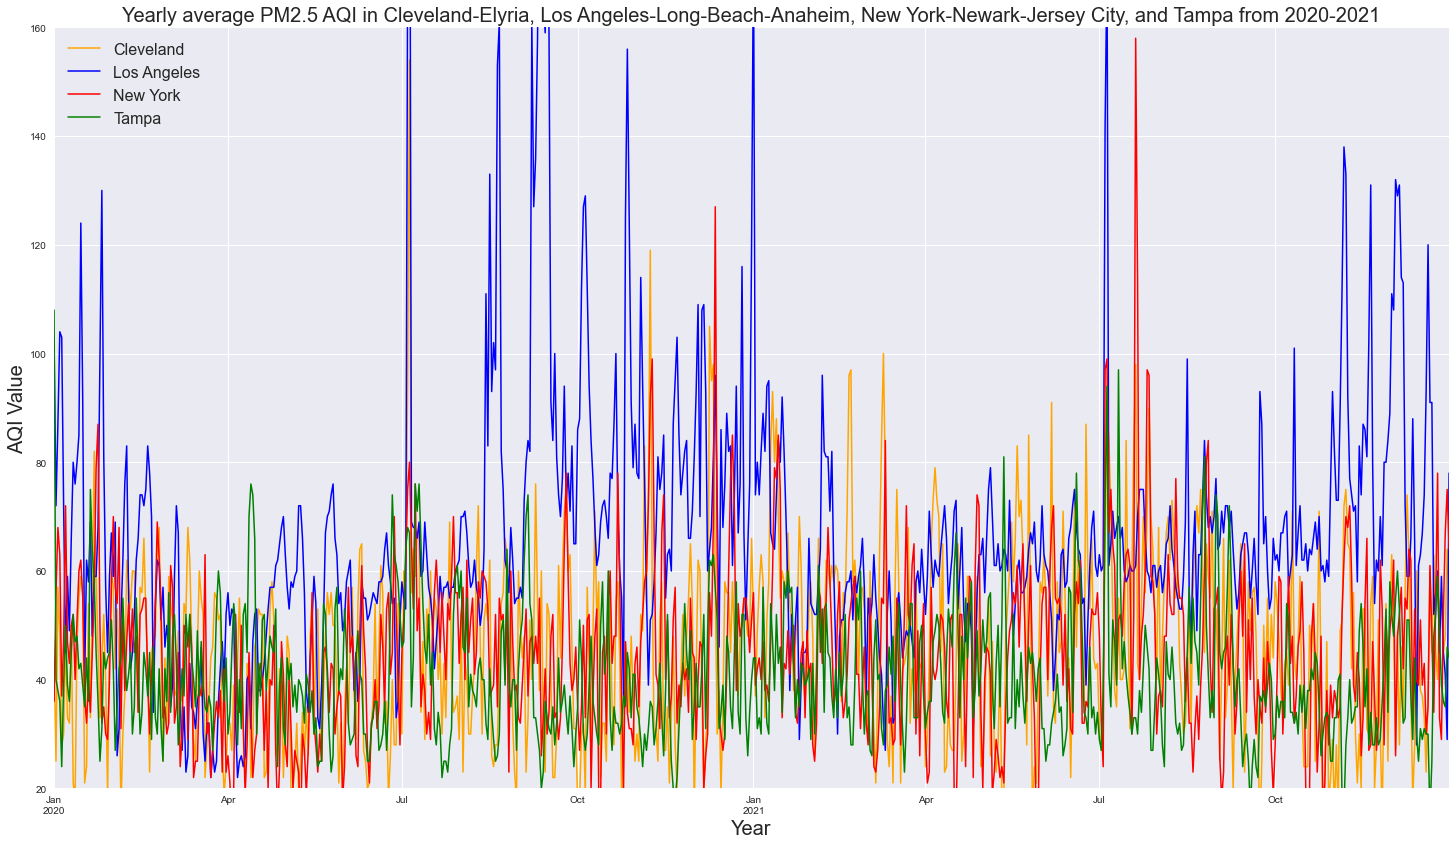

In [39]:
# Plot
plt.style.use('seaborn')
plt.figure(figsize=(25,14))

# line plot - the yearly average AQI in Cleveland-Elyria, OH and Los Angeles, CA
ax0 = merged['AQI Value CLE'].plot(color='orange', linewidth=1.5, grid=True, label='Cleveland')
ax1 = merged['AQI Value LA'].plot(color='blue', linewidth=1.5, grid=True, label='Los Angeles')
ax2 = merged['AQI Value NY-NJ'].plot(color='red', linewidth=1.5, grid=True, label='New York')
ax3 = merged['AQI Value TPA'].plot(color='green', linewidth=1.5, grid=True, label='Tampa')
ax0.legend(fontsize=16, loc=1)
ax1.legend(fontsize=16, loc=1)
ax2.legend(fontsize=16, loc=2)
ax3.legend(fontsize=16, loc=2)


# title and labels
plt.title('Yearly average PM2.5 AQI in Cleveland-Elyria, Los Angeles-Long-Beach-Anaheim, New York-Newark-Jersey City, and Tampa from 2020-2021', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('AQI Value', fontsize=20)
plt.ylim(20,160)
plt.show()

In [40]:
merged.describe()

,AQI Value CLE,AQI Value LA,AQI Value NY-NJ,AQI Value TPA
count,731.000000,731.000000,731.000000,731.000000
mean,46.179207,66.812585,44.813953,40.619699
std,17.311312,24.656693,15.712341,11.756681
min,12.000000,22.000000,12.000000,15.000000
25%,32.000000,55.000000,33.000000,33.000000
50%,46.000000,62.000000,44.000000,39.000000
75%,56.500000,73.000000,54.000000,46.000000
max,154.000000,225.000000,158.000000,108.000000


## Two-cities comparison

In [41]:
aqi_df0 = df_aqi_ny_2021.join(df_aqi_la_2021, lsuffix='_left', rsuffix='_right')
aqi_df0.head()

,AQI Value NY-NJ,AQI Value LA
Date,,
2020-01-01,36.0,102.0
2020-01-02,56.0,72.0
2020-01-03,68.0,87.0
2020-01-04,63.0,104.0
2020-01-05,37.0,103.0


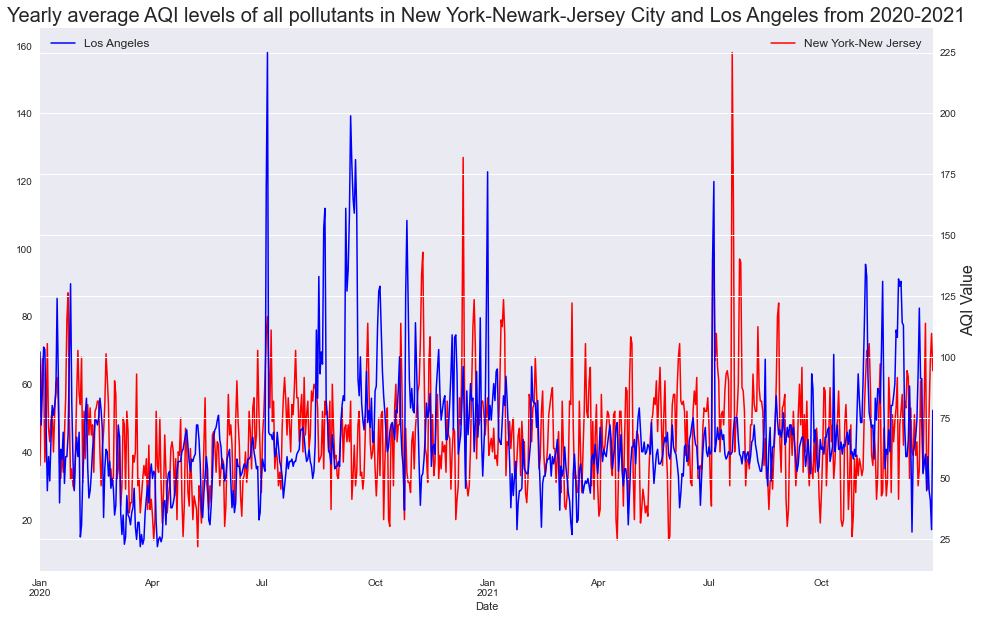

In [42]:
# Plotting NY-NJ and LA PM2.5 AQI levels
plt.style.use('seaborn')
plt.figure(figsize=(16,10))

# line plot - the yearly average AQI in New York and Los Angeles
ax0 = aqi_df0['AQI Value NY-NJ'].plot(color='red', linewidth=1.5, grid=False, label='New York-New Jersey')
ax1 = aqi_df0['AQI Value LA'].plot(color='blue', linewidth=1.5, grid=False, label='Los Angeles', secondary_y=True)
ax0.legend(fontsize=12, loc=1)
ax1.legend(fontsize=12, loc=2)


# title and labels
plt.title('Yearly average AQI levels of all pollutants in New York-Newark-Jersey City and Los Angeles from 2020-2021', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('AQI Value', fontsize=16)
plt.show()

In [43]:
aqi_df1 = df_aqi_cle_2021.join(df_aqi_ny_2021, lsuffix='_left', rsuffix='_right')
aqi_df1.head()

,AQI Value CLE,AQI Value NY-NJ
Date,,
2020-01-01,44.0,36.0
2020-01-02,25.0,56.0
2020-01-03,57.0,68.0
2020-01-04,48.0,63.0
2020-01-05,28.0,37.0


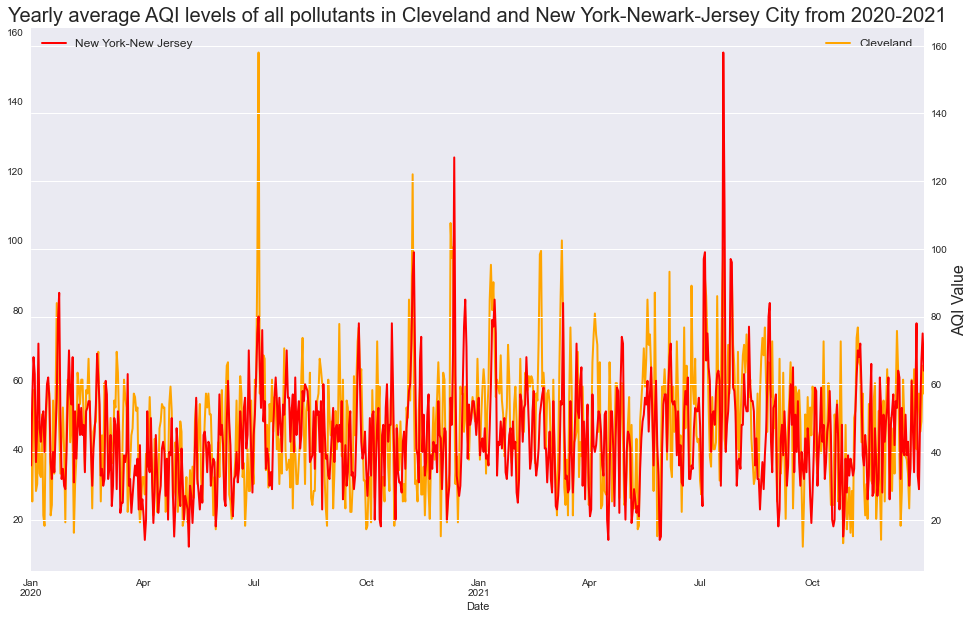

In [44]:
# Plotting CLE and NY-NJ PM2.5 AQI levels
plt.style.use('seaborn')
plt.figure(figsize=(16,10))

# line plot - the yearly average AQI in Cleveland and New York-New Jersey
ax0 = aqi_df1['AQI Value CLE'].plot(color='orange', linewidth=2, grid=False, label='Cleveland')
ax1 = aqi_df1['AQI Value NY-NJ'].plot(color='red', linewidth=2, grid=False, label='New York-New Jersey', secondary_y=True)
ax0.legend(fontsize=12, loc=1)
ax1.legend(fontsize=12, loc=2)


# title and labels
plt.title('Yearly average AQI levels of all pollutants in Cleveland and New York-Newark-Jersey City from 2020-2021', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('AQI Value', fontsize=16)
plt.show()

In [45]:
aqi_df2 = df_aqi_ta_2021.join(df_aqi_cle_2021, lsuffix='_left', rsuffix='_right')
aqi_df2.head()

,AQI Value TPA,AQI Value CLE
Date,,
2020-01-01,108.0,44.0
2020-01-02,40.0,25.0
2020-01-03,38.0,57.0
2020-01-04,36.0,48.0
2020-01-05,24.0,28.0


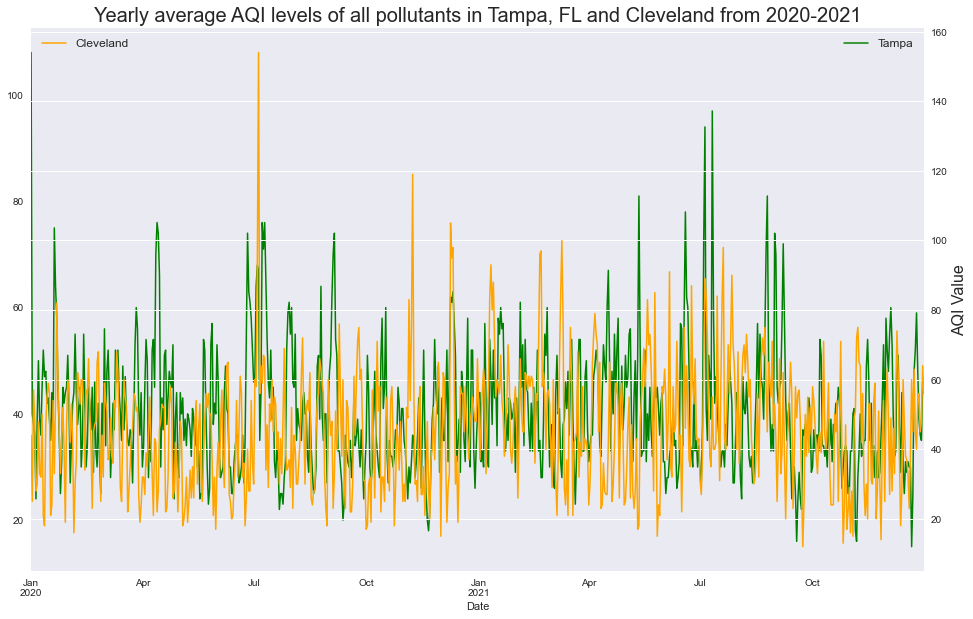

In [46]:
# Plotting Tampa and CLE PM2.5 AQI levels
plt.style.use('seaborn')
plt.figure(figsize=(16,10))

# line plot - the yearly average AQI in Tampa, FL and Cleveland
ax0 = aqi_df2['AQI Value TPA'].plot(color='green', linewidth=1.5, grid=False, label='Tampa')
ax1 = aqi_df2['AQI Value CLE'].plot(color='orange', linewidth=1.5, grid=False, label='Cleveland', secondary_y=True)
ax0.legend(fontsize=12, loc=1)
ax1.legend(fontsize=12, loc=2)


# title and labels
plt.title('Yearly average AQI levels of all pollutants in Tampa, FL and Cleveland from 2020-2021', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('AQI Value', fontsize=16)
plt.show()

In [47]:
aqi_df3 = df_aqi_la_2021.join(df_aqi_cle_2021, lsuffix='_left', rsuffix='_right')
aqi_df3.head()

,AQI Value LA,AQI Value CLE
Date,,
2020-01-01,102.0,44.0
2020-01-02,72.0,25.0
2020-01-03,87.0,57.0
2020-01-04,104.0,48.0
2020-01-05,103.0,28.0


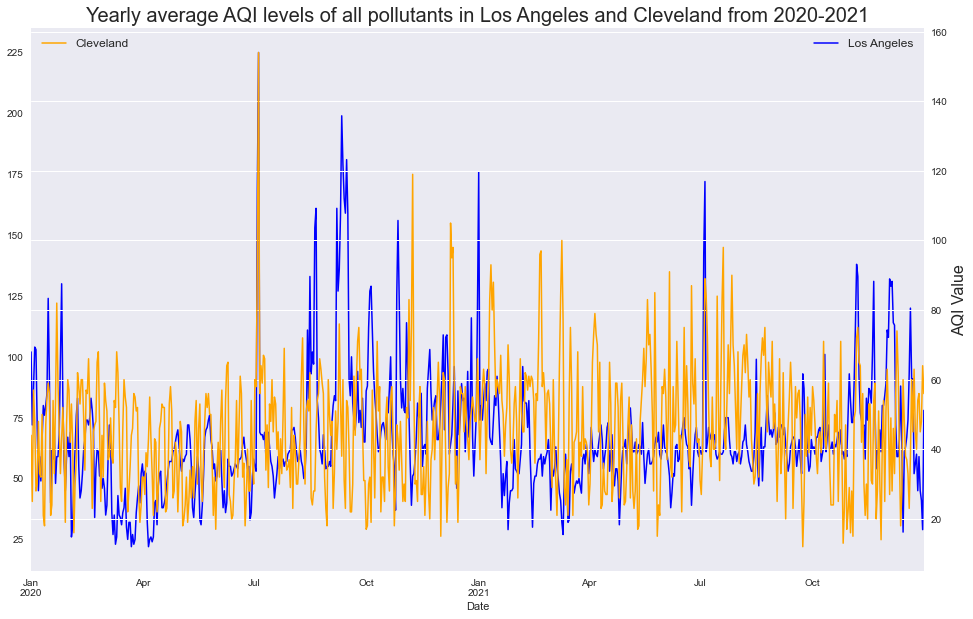

In [48]:
# Plotting LA and CLE PM2.5 AQI levels
plt.style.use('seaborn')
plt.figure(figsize=(16,10))

# line plot - the yearly average AQI in LA and CLE
ax0 = aqi_df3['AQI Value LA'].plot(color='blue', linewidth=1.5, grid=False, label='Los Angeles')
ax1 = aqi_df3['AQI Value CLE'].plot(color='orange', linewidth=1.5, grid=False, label='Cleveland', secondary_y=True)
ax0.legend(fontsize=12, loc=1)
ax1.legend(fontsize=12, loc=2)


# title and labels
plt.title('Yearly average AQI levels of all pollutants in Los Angeles and Cleveland from 2020-2021', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('AQI Value', fontsize=16)
plt.show()

In [49]:
aqi_df4 = df_aqi_ny_2021.join(df_aqi_ta_2021, lsuffix='_left', rsuffix='_right')
aqi_df4.head()

,AQI Value NY-NJ,AQI Value TPA
Date,,
2020-01-01,36.0,108.0
2020-01-02,56.0,40.0
2020-01-03,68.0,38.0
2020-01-04,63.0,36.0
2020-01-05,37.0,24.0


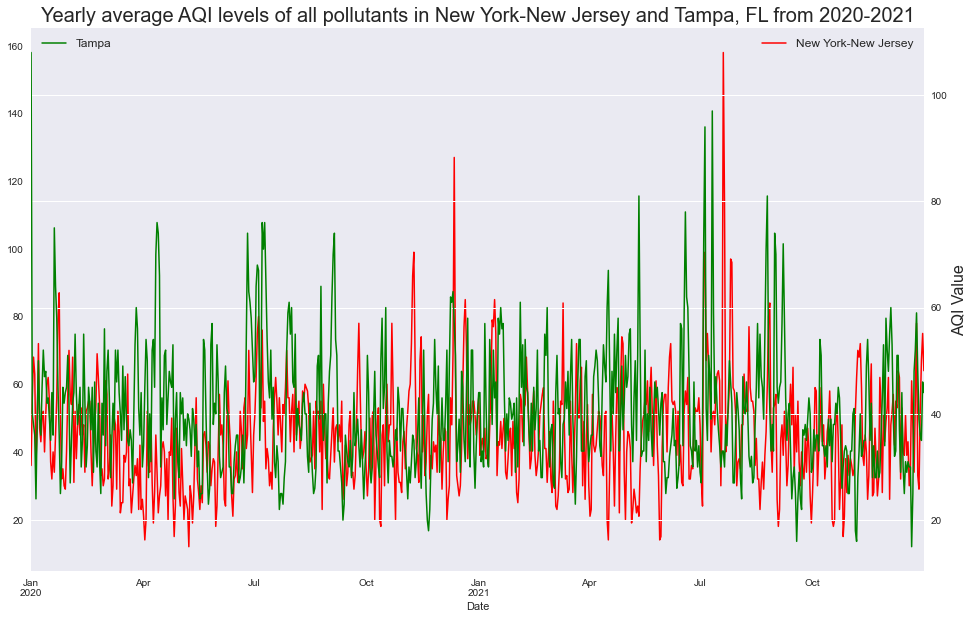

In [52]:
# Plotting Tampa and NY-NJ PM2.5 AQI levels
plt.style.use('seaborn')
plt.figure(figsize=(16,10))

# line plot - the yearly average AQI in Tampa and NY-NJ
ax0 = aqi_df4['AQI Value NY-NJ'].plot(color='red', linewidth=1.5, grid=False, label='New York-New Jersey')
ax1 = aqi_df4['AQI Value TPA'].plot(color='green', linewidth=1.5, grid=False, label='Tampa', secondary_y=True)
ax0.legend(fontsize=12, loc=1)
ax1.legend(fontsize=12, loc=2)


# title and labels
plt.title('Yearly average AQI levels of all pollutants in New York-New Jersey and Tampa, FL from 2020-2021', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('AQI Value', fontsize=16)
plt.show()

## Cumulative Moving Average

In [53]:
# cumulative moving averages for each city
df_cle_2021['CMA'] = df_cle_2021['PM2.5 AQI Value'].expanding().mean()
df_la_2021['CMA'] = df_la_2021['PM2.5 AQI Value'].expanding().mean()
df_ny_2021['CMA'] = df_ny_2021['PM2.5 AQI Value'].expanding().mean()
df_ta_2021['CMA'] = df_ta_2021['PM2.5 AQI Value'].expanding().mean()

Text(0, 0.5, 'AQI Value')

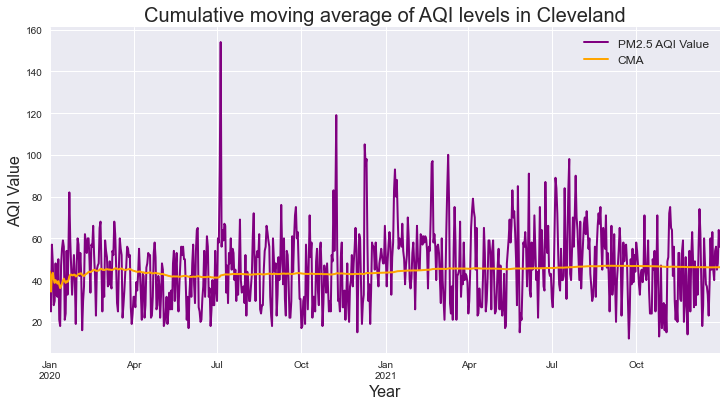

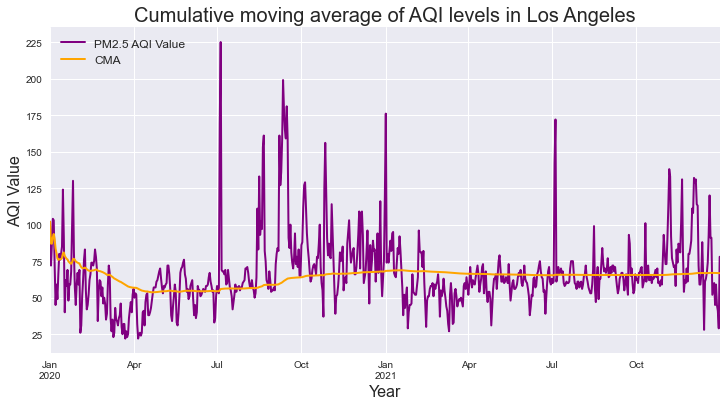

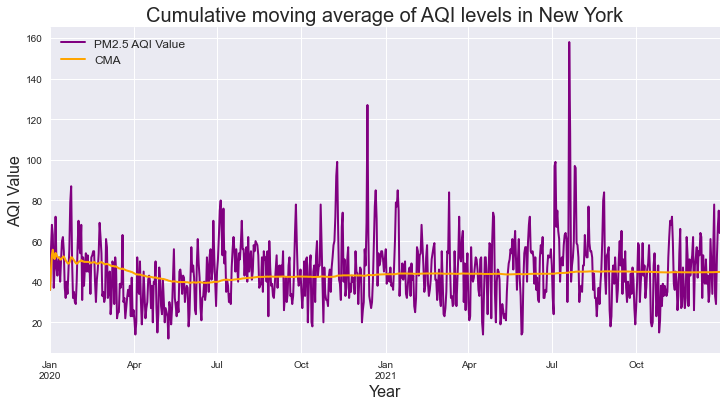

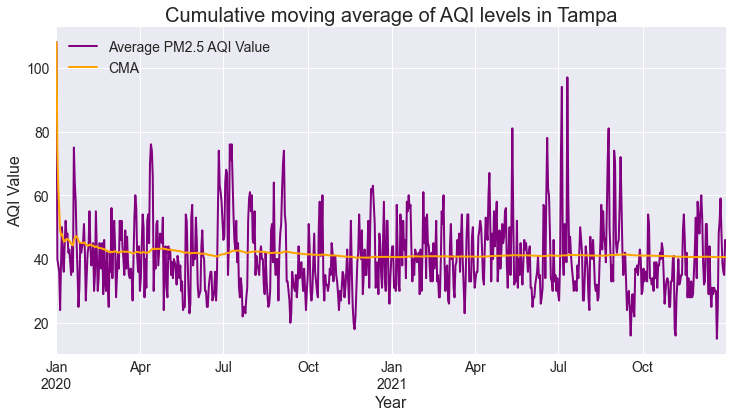

In [54]:
# Plot
# Colors for line plot
colors = ['purple', 'orange']

# line plot - the yearly average AQI levels
ax0 = df_cle_2021[['PM2.5 AQI Value', 'CMA']].plot(color=colors, linewidth=2, figsize=(12,6))
ax1 = df_la_2021[['PM2.5 AQI Value', 'CMA']].plot(color=colors, linewidth=2, figsize=(12,6))
ax2 = df_ny_2021[['PM2.5 AQI Value', 'CMA']].plot(color=colors, linewidth=2, figsize=(12,6))
ax3 = df_ta_2021[['PM2.5 AQI Value', 'CMA']].plot(color=colors, linewidth=2, figsize=(12,6))
ax0.legend(fontsize=12, loc=1)
ax1.legend(fontsize=12, loc=2)
ax2.legend(fontsize=12, loc=2)
ax3.legend(fontsize=12, loc=2)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average PM2.5 AQI Value', 'CMA'], fontsize=14)

# title and labels
ax0.set_title('Cumulative moving average of AQI levels in Cleveland', fontsize=20)
ax0.set_xlabel('Year', fontsize=16)
ax0.set_ylabel('AQI Value', fontsize=16)
ax1.set_title('Cumulative moving average of AQI levels in Los Angeles', fontsize=20)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('AQI Value', fontsize=16)
ax2.set_title('Cumulative moving average of AQI levels in New York', fontsize=20)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('AQI Value', fontsize=16)
ax3.set_title('Cumulative moving average of AQI levels in Tampa', fontsize=20)
ax3.set_xlabel('Year', fontsize=16)
ax3.set_ylabel('AQI Value', fontsize=16)

## Preliminary stats

In [55]:
print('Cleveland AQI stats:', df_cle_2021.describe())
print('NY-NJ AQI stats:', df_la_2021.describe())
print('LA AQI stats:', df_ny_2021.describe())
print('Tampa AQI stats:', df_ta_2021.describe())

Cleveland AQI stats:        PM2.5 AQI Value         CMA
count       731.000000  731.000000
mean         46.179207   44.339893
std          17.311312    1.868674
min          12.000000   34.500000
25%          32.000000   42.935460
50%          46.000000   44.711111
75%          56.500000   45.832573
max         154.000000   46.886700
NY-NJ AQI stats:        PM2.5 AQI Value         CMA
count       731.000000  731.000000
mean         66.812585   64.361745
std          24.656693    5.838787
min          22.000000   53.690265
25%          55.000000   61.977364
50%          62.000000   65.646154
75%          73.000000   66.861298
max         225.000000  102.000000
LA AQI stats:        PM2.5 AQI Value         CMA
count       731.000000  731.000000
mean         44.813953   43.985103
std          15.712341    2.524342
min          12.000000   36.000000
25%          33.000000   42.492094
50%          44.000000   43.904051
75%          54.000000   44.744838
max         158.000000   55.750000
Tam